# ***About data***

https://books.google.jo/books?id=BhUuEAAAQBAJ&pg=PA297&lpg=PA297&dq=The+month+the+borrower%27s+earliest+reported+credit+line+was+opened&source=bl&ots=NKGc7h8M1V&sig=ACfU3U1j39FgH0BPSqUOwcBLoF0DZv7aVQ&hl=en&sa=X&ved=2ahUKEwjmvsax-uXzAhUH8BQKHTKkAsgQ6AF6BAgSEAM#v=onepage&q=The%20month%20the%20borrower's%20earliest%20reported%20credit%20line%20was%20opened&f=false

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', -1)
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shAi/second part project/projects/lending_club_info.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


# **Import library**

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ***Data understand***

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shAi/second part project/projects/lending_club_loan_two.csv')
data


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# ***Data preprocessing***

In [ ]:
data.dropna(inplace=True)

In [ ]:
object_name=data.select_dtypes(['object']).columns
object_name

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
data['issue_d_year'] = pd.to_datetime(data['issue_d']).dt.year

data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month
data.drop(['issue_d'],axis=1,inplace=True)

In [ ]:
data['earliest_cr_line_year'] = pd.to_datetime(data['earliest_cr_line']).dt.year

data['earliest_cr_line_month'] = pd.to_datetime(data['earliest_cr_line']).dt.month
data.drop(['earliest_cr_line'],axis=1,inplace=True)


In [ ]:
data.drop(['emp_title','title'],axis=1,inplace=True)

In [ ]:
data['address']=data['address'].apply(lambda term :term.split()[-1]).astype(int)


In [ ]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,2015,1,1990,6
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,5113,2015,1,2004,7
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,5113,2015,1,2007,8
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,813,2014,11,2006,9
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,5 years,RENT,64000.0,Not Verified,Fully Paid,debt_consolidation,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,5113,2013,3,1991,11
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723,2015,10,2004,11
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,5113,2015,2,2006,2
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,Fully Paid,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466,2013,10,1997,3


# ***data visualization***


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1b2254610>,
      dtype=object)

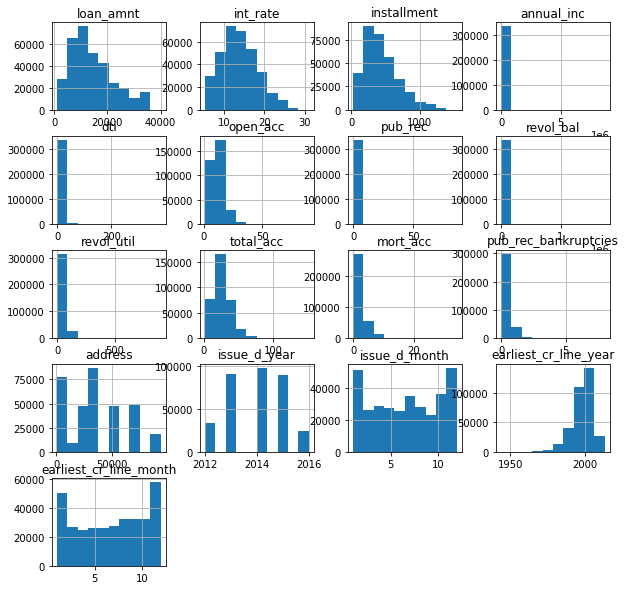

In [ ]:
data.hist(figsize=[10,10])

In [ ]:
plt.figure(figsize=[10,10])
sns.pairplot(data=data,corner=True)

<Figure size 720x720 with 0 Axes>

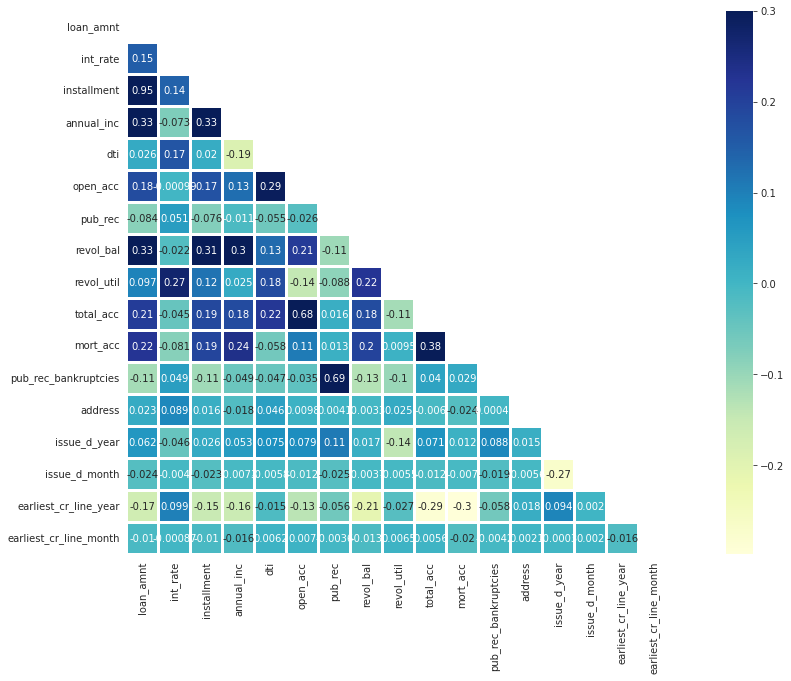

In [ ]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3, square=True,annot=True, cmap="YlGnBu",linewidths=1.5)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


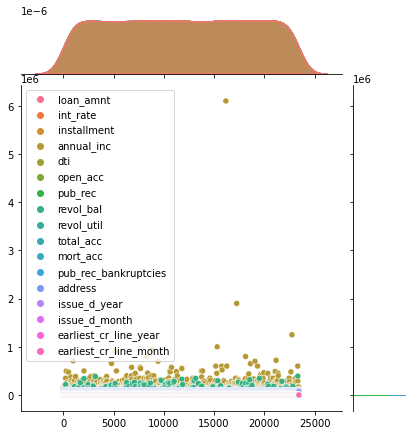

In [ ]:
sns.jointplot(data=data[:20000])

In [ ]:
!pip install xlrd
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 3.1 MB 42.1 MB/s 
Imported AutoViz_Class version: 0.0.85. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


In [ ]:
AV = AutoViz_Class()
df = AV.AutoViz(filename="", depVar='loan_status', dfte=data, header=1, verbose=1, lowess=False, 
                 )

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install pandas-profiling==2.11.0
import pandas_profiling as pp

     |████████████████████████████████| 243 kB 24.5 MB/s 
     |████████████████████████████████| 4.7 MB 27.2 MB/s 
     |████████████████████████████████| 62 kB 951 kB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 675 kB 58.3 MB/s 
     |████████████████████████████████| 812 kB 50.0 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=4a6473dcecb31298108ab9e01201cab65591d9c45c9b9492431dc0d79aa4959a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=e727ffe7fee0175fc519964630545f7971c5a1a43f51bcdc20b9f51ad7e13884
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    

In [ ]:
pp.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

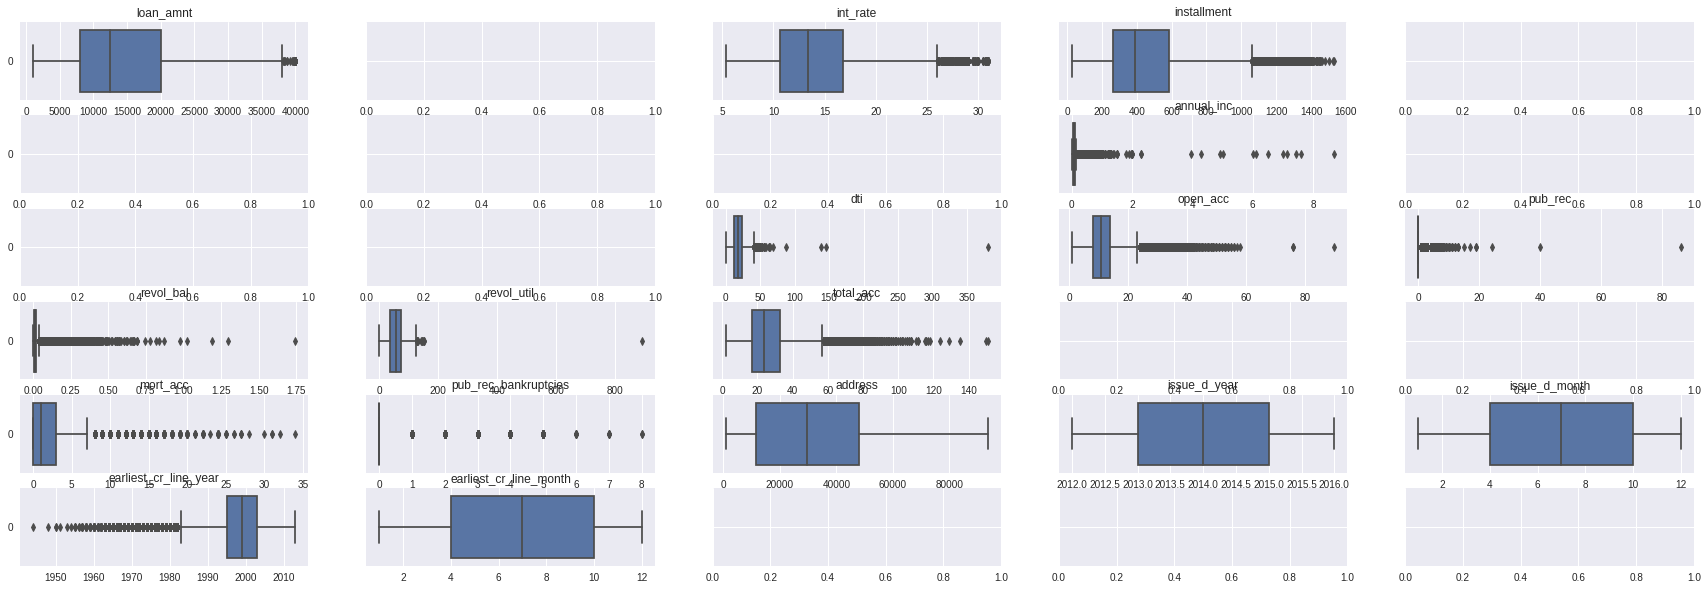

In [ ]:
from math import ceil
fig, axes = plt.subplots(ceil(data.shape[1]/5), 5, figsize=(30, 10), sharey=True)
for column,count in zip(data.columns,range(data.shape[1]+1)):
  try:
    sns.boxplot(data=data[column],orient='h',ax=axes[count//5][count%5])
    axes[count//5][count%5].set_title(column)

  except:
    continue



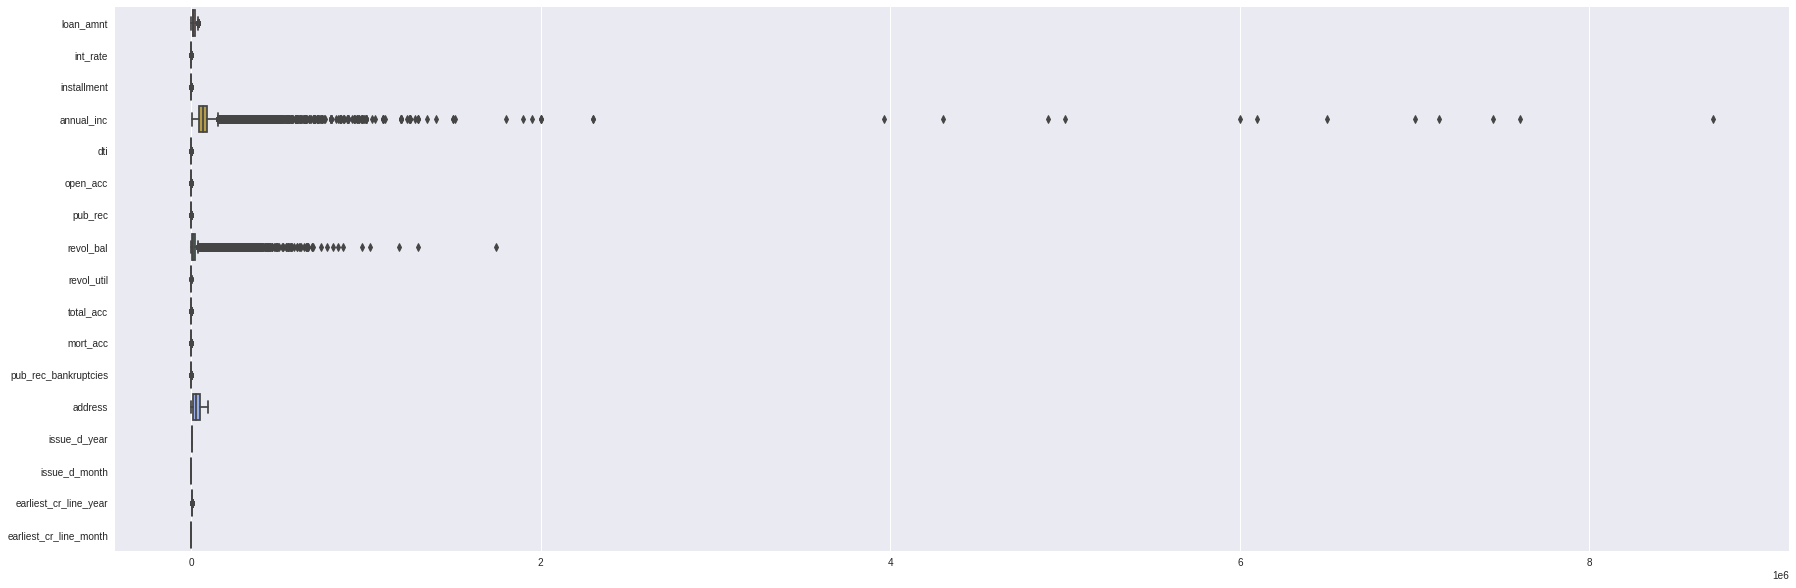

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data,orient='h')

# ***Encoder***

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe=OrdinalEncoder()
data[['grade','term','sub_grade','emp_length']]=oe.fit_transform(data[['grade','term','sub_grade','emp_length']])
lb=LabelEncoder()
data['loan_status']=lb.fit_transform(data['loan_status'])
data=pd.get_dummies(data,columns=['home_ownership','verification_status','purpose','application_type','initial_list_status',],dtype=np.float64)

In [ ]:
data.corr()['loan_status'].sort_values()

address                               -0.348266
sub_grade                             -0.269475
grade                                 -0.263481
int_rate                              -0.250679
term                                  -0.182039
dti                                   -0.132841
revol_util                            -0.077498
home_ownership_RENT                   -0.068957
loan_amnt                             -0.062386
earliest_cr_line_year                 -0.045854
issue_d_year                          -0.044709
verification_status_Verified          -0.042999
installment                           -0.041973
verification_status_Source Verified   -0.040947
purpose_debt_consolidation            -0.033590
open_acc                              -0.029856
purpose_small_business                -0.029775
emp_length                            -0.015292
pub_rec                               -0.013794
purpose_other                         -0.011548
purpose_moving                        -0

# ***balanced dataset***

## ***ADASYN***

In [ ]:
def class_performance(predict):
  print(accuracy_score(y_test,predict))
  print(classification_report(y_test,predict))
  sns.heatmap(confusion_matrix(y_test,predict),fmt='.2f',annot=True)
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']


In [ ]:
from imblearn.over_sampling import ADASYN
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']
sm = ADASYN(random_state=42)
X_res_ADASYN, y_res_ADASYN = sm.fit_resample(x, y)
print(f'Resampled dataset samples per class {Counter(y_res_ADASYN)}')


Resampled dataset samples per class Counter({1: 269556, 0: 266889})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res_ADASYN, y_res_ADASYN,test_size=0.2,random_state=42)

0.8113320098052923
              precision    recall  f1-score   support

           0       0.77      0.89      0.82     53217
           1       0.87      0.74      0.80     54072

    accuracy                           0.81    107289
   macro avg       0.82      0.81      0.81    107289
weighted avg       0.82      0.81      0.81    107289



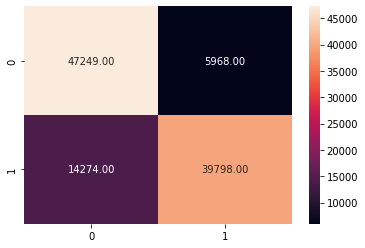

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***BorderlineSMOTE***

In [ ]:
from imblearn.over_sampling import  BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_res_BorderlineSMOTE, y_res_BorderlineSMOTE = sm.fit_resample(x, y)
print(f'Resampled dataset samples per class {Counter(y_res_BorderlineSMOTE)}')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset samples per class Counter({1: 269556, 0: 269556})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res_BorderlineSMOTE, y_res_BorderlineSMOTE,test_size=0.2,random_state=42)

0.8186472274004619
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     53820
           1       0.87      0.75      0.81     54003

    accuracy                           0.82    107823
   macro avg       0.82      0.82      0.82    107823
weighted avg       0.82      0.82      0.82    107823



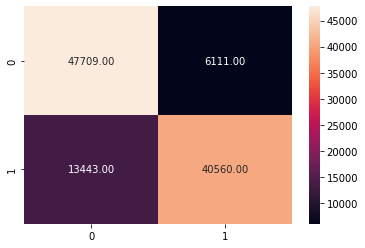

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***SMOTETomek***

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_res_SMOTETomek, y_res_SMOTETomek, = sm.fit_resample(x, y)
print(f'Resampled dataset samples per class {Counter(y_res_SMOTETomek)}')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset samples per class Counter({1: 257156, 0: 257156})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res_SMOTETomek, y_res_SMOTETomek,test_size=0.2,random_state=42)

0.891768663173347
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     51495
           1       0.87      0.92      0.89     51368

    accuracy                           0.89    102863
   macro avg       0.89      0.89      0.89    102863
weighted avg       0.89      0.89      0.89    102863



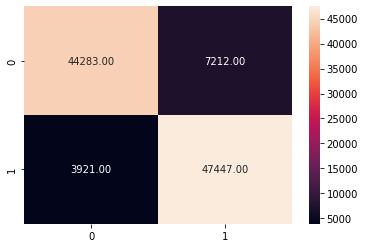

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***SMOTEENN***

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_res_SMOTEENN, y_res_SMOTEENN = sm.fit_resample(x, y)
print(f'Resampled dataset samples per class {Counter(y_res_SMOTEENN)}')


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res_SMOTEENN, y_res_SMOTEENN,test_size=0.2,random_state=42)

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***MDO***

In [ ]:
!pip install multi-imbalance

     |████████████████████████████████| 280 kB 8.3 MB/s 
     |████████████████████████████████| 189 kB 48.6 MB/s 
     |████████████████████████████████| 213 kB 44.2 MB/s 
     |████████████████████████████████| 790 kB 40.7 MB/s 
     |████████████████████████████████| 23.2 MB 2.1 MB/s 
     |████████████████████████████████| 374 kB 59.6 MB/s 
  Created wheel for multi-imbalance: filename=multi_imbalance-0.0.14-py3-none-any.whl size=44800 sha256=6d93e7266be9192a177bd62aa09f4036b13b1f67241e36ae61b722cd28888c03
  Stored in directory: /root/.cache/pip/wheels/40/76/27/e8da934f9d466e634903cb765815ddaf415d18ab629f6ff884
Successfully built multi-imbalance
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
  Attempting uninstall: scikit

In [ ]:
from multi_imbalance.resampling.mdo import MDO

# Mahalanbois Distance Oversampling
mdo = MDO(k=8, k1_frac=0, seed=0)
from sklearn.model_selection import train_test_split


# preprocess
X_res_MDO, y_res_MDO = mdo.fit_resample(x,y)


x_train,x_test,y_train,y_test=train_test_split(X_res_MDO, y_res_MDO,test_size=0.2,random_state=42)
print(f'Resampled dataset samples per class {Counter(y_res_MDO)}')


Resampled dataset samples per class Counter({1: 269556, 0: 269556})


In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)


0.9313782773619729
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     53820
           1       0.88      1.00      0.94     54003

    accuracy                           0.93    107823
   macro avg       0.94      0.93      0.93    107823
weighted avg       0.94      0.93      0.93    107823



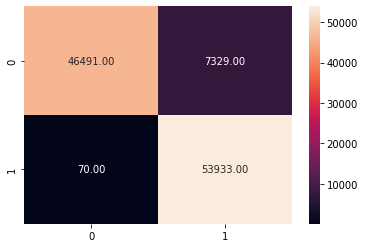

In [ ]:
class_performance(y_pred)

## ***StaticSMOTE***

In [ ]:
from multi_imbalance.resampling.static_smote import StaticSMOTE

# Mahalanbois Distance Oversampling
mdo = StaticSMOTE()
from sklearn.model_selection import train_test_split


# preprocess
X_res_StaticSMOTE, y_res_StaticSMOTE = mdo.fit_resample(x,y)


x_train,x_test,y_train,y_test=train_test_split(X_res_StaticSMOTE, y_res_StaticSMOTE,test_size=0.2,random_state=42)
print(f'Resampled dataset samples per class {Counter(y_res_StaticSMOTE)}')


Resampled dataset samples per class Counter({1: 269556, 0: 265248})


0.9267116051644992
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     52993
           1       0.88      0.98      0.93     53968

    accuracy                           0.93    106961
   macro avg       0.93      0.93      0.93    106961
weighted avg       0.93      0.93      0.93    106961



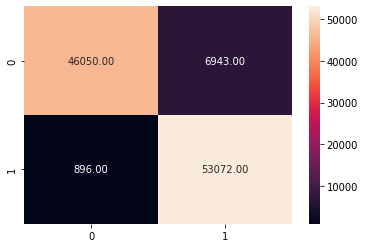

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***SMOTE***

In [ ]:
!pip install smote-variants

     |████████████████████████████████| 134 kB 5.3 MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=890c490d0a5c10be424d2a48d1df0ce0e3c528e5392e36b05aeb04d11455108b
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7452 sha256=6c6e6a724c504daa0565d4d5fa10d1d2842bba62d37df2cc7fa3702b00893411
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [ ]:
import smote_variants
oversampler= smote_variants.SMOTE()
X_samp, y_samp= oversampler.sample(x.values, y.values)

x_train,x_test,y_train,y_test=train_test_split(X_samp, y_samp,test_size=0.2,random_state=42)
print(f'Resampled dataset samples per class {Counter(y_samp)}')

0.894957476605177
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     53820
           1       0.86      0.94      0.90     54003

    accuracy                           0.89    107823
   macro avg       0.90      0.89      0.89    107823
weighted avg       0.90      0.89      0.89    107823



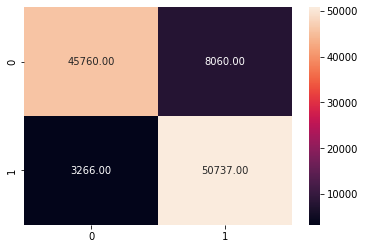

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***MulticlassOversampling***

In [ ]:
import smote_variants as sv
oversampler= sv.MulticlassOversampling(sv.distance_SMOTE(n_neighbors=8))
X_samp_Multiclass, y_samp_Multiclass= oversampler.sample(x.values, y.values)

x_train,x_test,y_train,y_test=train_test_split(X_samp_Multiclass, y_samp_Multiclass,test_size=0.2,random_state=42)
print(f'Resampled dataset samples per class {Counter(y_samp_Multiclass)}')


0.9306919673910019
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     53820
           1       0.88      1.00      0.94     54003

    accuracy                           0.93    107823
   macro avg       0.94      0.93      0.93    107823
weighted avg       0.94      0.93      0.93    107823



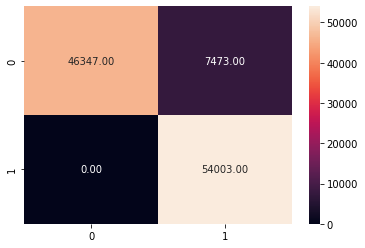

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

## ***polynom_fit_SMOTE***

In [ ]:
import smote_variants 
oversampler= smote_variants.polynom_fit_SMOTE()
X_samp_polynom, y_samp_polynom= oversampler.sample(x.values, y.values)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_samp_polynom, y_samp_polynom,test_size=0.2,random_state=42)
print(f'Resampled dataset samples per class {Counter(y_samp_polynom)}')


2021-11-01 08:45:06,421:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


Resampled dataset samples per class Counter({1: 318357, 0: 310692})


0.9309654920952497
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     52993
           1       0.88      1.00      0.94     53968

    accuracy                           0.93    106961
   macro avg       0.94      0.93      0.93    106961
weighted avg       0.94      0.93      0.93    106961



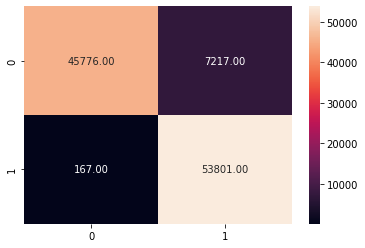

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)

# ***Split***

In [ ]:
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']
X_samp_polynom=pd.DataFrame(X_samp_polynom,columns=list(data.drop(['loan_status'],axis=1)))
y_samp_polynom=pd.DataFrame(y_samp_polynom,columns=['loan_status'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_samp_polynom, y_samp_polynom,test_size=0.05,random_state=42)

# ***Training***

In [ ]:
!pip install --user -U xgboost

## ***XGBClassifier***

0.9314532794963915
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     15642
           1       0.88      1.00      0.94     15811

    accuracy                           0.93     31453
   macro avg       0.94      0.93      0.93     31453
weighted avg       0.94      0.93      0.93     31453



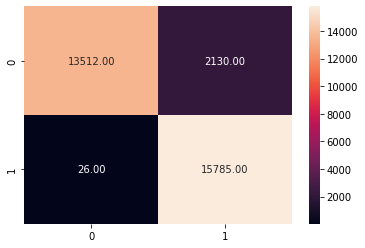

In [ ]:
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBClassifier(learning_rate=0.1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)


## ***XGBRFClassifier***

0.9125687147077521
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     13266
           1       0.85      1.00      0.92     13475

    accuracy                           0.91     26741
   macro avg       0.93      0.91      0.91     26741
weighted avg       0.93      0.91      0.91     26741



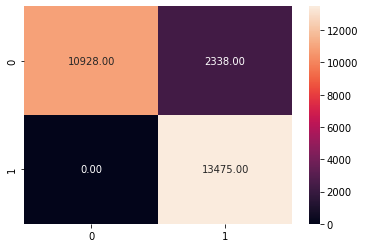

In [ ]:
from xgboost import  XGBRFClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
xg=XGBRFClassifier(learning_rate=0.1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
class_performance(y_pred)


## ***CatBoostClassifier***

In [ ]:
!pip install catboost

0.9322388841105419
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     13266
           1       0.89      0.99      0.94     13475

    accuracy                           0.93     26741
   macro avg       0.94      0.93      0.93     26741
weighted avg       0.94      0.93      0.93     26741



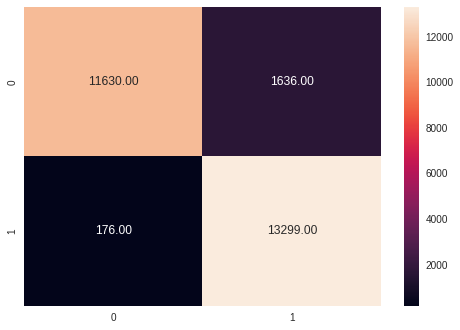

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cat=CatBoostClassifier(verbose=0,learning_rate=0.1)
cat.fit(x_train,y_train)
y_pred=cat.predict(x_test)
class_performance(y_pred)

## ***fpr_fnr_curve***

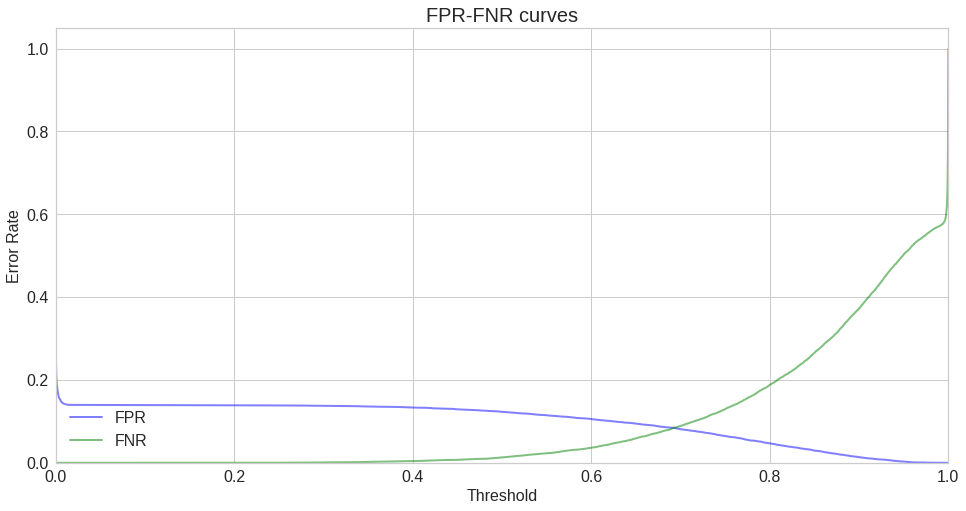

In [ ]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(x_test,y_test,)
curve = get_roc_curve(cat, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)


(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [ ]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01))
print(select_threshold(model=model, data=eval_pool, FPR=0.01))

0.48321782132258817
0.9155199923572033


0.9322388841105419
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     13266
           1       0.89      0.99      0.94     13475

    accuracy                           0.93     26741
   macro avg       0.94      0.93      0.93     26741
weighted avg       0.94      0.93      0.93     26741



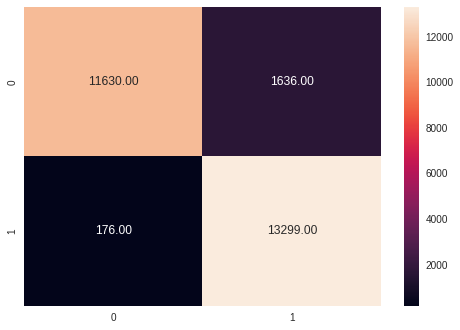

In [ ]:
# y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")
train_pred_90 = (y_pred >=0.1)
class_performance(train_pred_90)

In [ ]:
from sklearn.ensemble import StackingRegressor,ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from catboost import  CatBoostRegressor

# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestRegressor(n_estimators=100, random_state=42)),
                 ('rf_2', CatBoostRegressor(verbose=0))  ,
                 ('ExtraTreesRegressor',ExtraTreesRegressor())  ,
                  ('AdaBoostRegressor',AdaBoostRegressor())           
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingRegressor(estimators=base_learners, final_estimator=XGBRegressor(verbose=0))

# Extract score

clf.fit(x_train, y_train)
r2_score(y_test,clf.predict(x_test))

# ***shap***

In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509229 sha256=99b5455344208c739c27d28a90118deeb4bcfd4272a4270ced9c2bbbce5276d9
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

[18:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


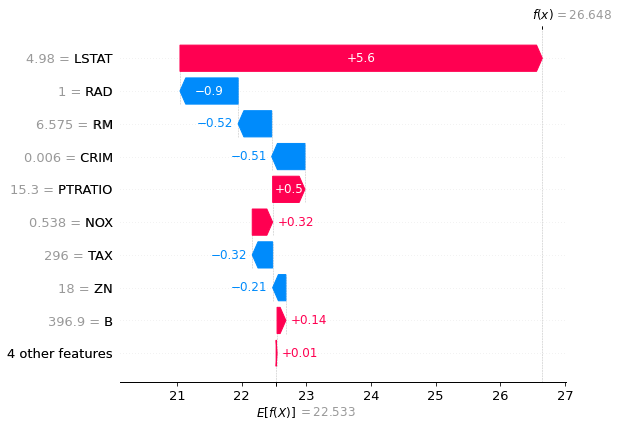

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

## ***visualize the first prediction's explanation with a force plot***

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

## ***visualize all the training set predictions***

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

## ***create a dependence scatter plot to show the effect of a single feature across the whole dataset***

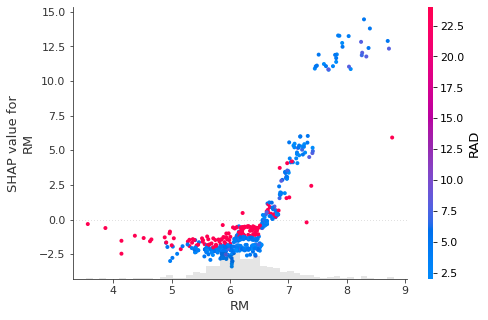

In [ ]:
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

## ***summarize the effects of all the features***

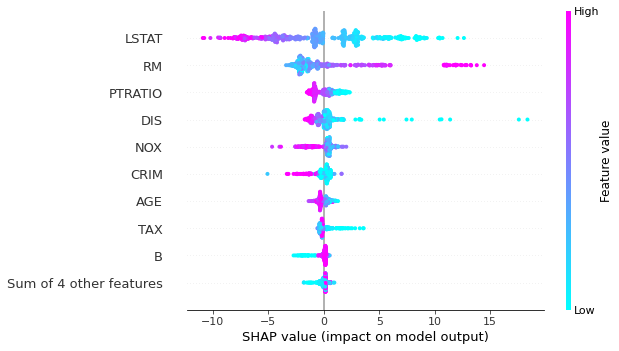

In [ ]:
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

## ***We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):***

Passing a matrix of SHAP values to the bar plot function creates a global feature importance plot, where the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples.

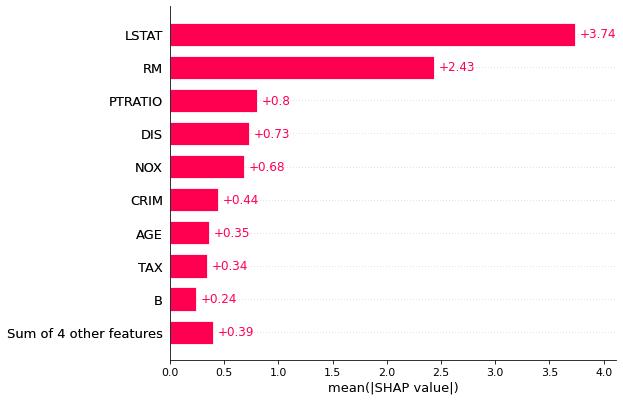

In [ ]:
shap.plots.bar(shap_values)

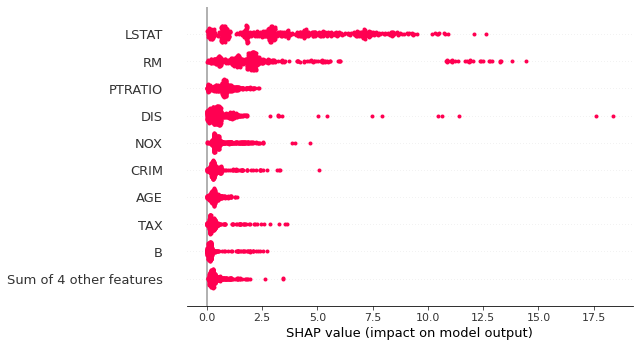

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

## ***heatmap***

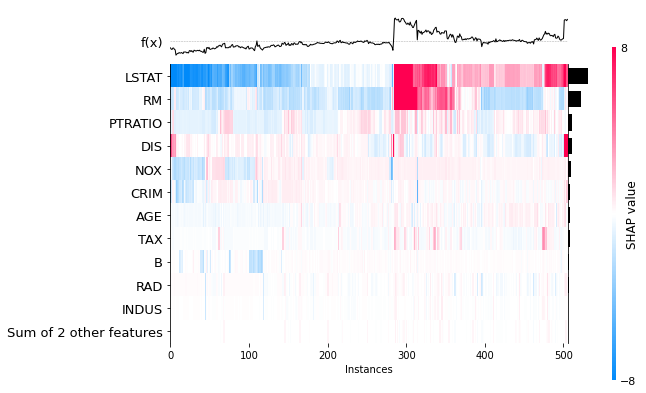

In [ ]:
shap.plots.heatmap(shap_values, max_display=12)

# ***Auto ML***

## ***Auto_ViML***

In [ ]:
pip install autoviml

     |████████████████████████████████| 125 kB 14.7 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 125 kB 69.5 MB/s 
     |████████████████████████████████| 189 kB 75.8 MB/s 
     |████████████████████████████████| 170 kB 71.2 MB/s 
     |████████████████████████████████| 371 kB 55.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 173.5 MB 16 kB/s 
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509261 sha256=c3143fa7eda538bab53d5d4d685f22f132ca55a7ca463d9ccbd32b6a9cb401b4
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=313c0c0b73ae326b8aa1bccf9da319c78b38ca649cb459451fea47d6f2e17a28
  Stored in directory: /root/.cache/pip/wheels/ea/5f/

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (335868, 50)
    Training Set Memory Usage = 140.69 MB
Single_Label Target: ['loan_status']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:   66312  ->   19.7%
           1:  269556  ->   80.3%
    Target loan_status is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    49 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    GPU active on this device
##########

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.062645
0:	learn: 0.8283363	test: 0.8276119	best: 0.8276119 (0)	total: 148ms	remaining: 12m 18s


500:	learn: 0.8893797	test: 0.8869056	best: 0.8870396 (448)	total: 39.8s	remaining: 5m 57s
1000:	learn: 0.8927925	test: 0.8870247	best: 0.8873225 (772)	total: 1m 19s	remaining: 5m 17s
1500:	learn: 0.8955913	test: 0.8876946	best: 0.8878882 (1462)	total: 1m 59s	remaining: 4m 37s
2000:	learn: 0.8979880	test: 0.8876798	best: 0.8878882 (1462)	total: 2m 39s	remaining: 3m 58s
2500:	learn: 0.9001355	test: 0.8875904	best: 0.8878882 (1462)	total: 3m 19s	remaining: 3m 18s
3000:	learn: 0.9022233	test: 0.8872778	best: 0.8878882 (1462)	total: 3m 58s	remaining: 2m 38s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.887888171
bestIteration = 1462

Shrink model to first 1463 iterations.
    Actual training time (in seconds): 276
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  weighted-f1 = 88.8%
    CatBoost Best Parameters for Model: Iterations = 1462, learning_rate = 0.06
Finding Best Threshold for Highest F1 Score...
    Using thr

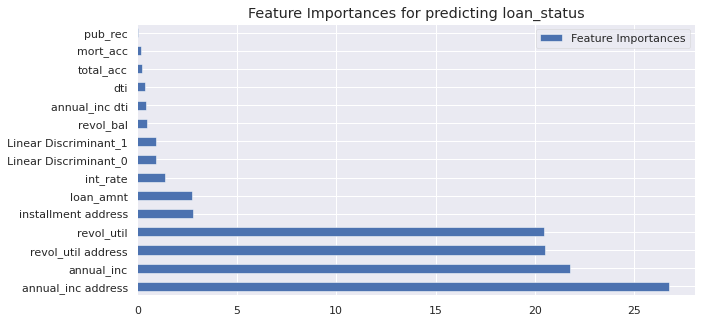

In [ ]:
from autoviml.Auto_ViML import Auto_ViML
model, features, trainm, testm = Auto_ViML(
    pd.DataFrame(x).join(pd.DataFrame(y,columns=['loan_status'])),
    'loan_status',
    
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag="CatBoost",
    Binning_Flag=False,
    Add_Poly=True,
    Stacking_Flag=True,
    Imbalanced_Flag=False,
    verbose=0,
)

## ***tpot***

In [ ]:
pip install tpot


     |████████████████████████████████| 87 kB 4.6 MB/s 
     |████████████████████████████████| 160 kB 44.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=361d2858b429bc32a463db2a50bf693b24f83325c7f4cad4f08662db1879c80d
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit


In [ ]:
import tpot
clf = tpot.TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
clf.fit(x,y)
print(clf.score(x_test, y_test))
#

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

## ***auto gluon***

In [ ]:

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
jn nk23erh!0\ pip install -U autogluon iu783 bn8in8m9

     |████████████████████████████████| 1.7 MB 13.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Using cached setuptools-58.3.0-py3-none-any.whl (946 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 46.9 MB 39 kB/s              
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 273 kB 16.2 MB/s            
     |████████████████████████████████| 352 kB 73.4 MB/s            
     |████████████████████████████████| 52 kB 1.4 MB/s             
     |████████████████████████████████| 56 kB 4.5 MB/s             
     |████████████████████████████████| 22.3 MB 1.8 MB/s             
     |████████████████████████████████| 131 kB 63.9 MB/s            
     |████████████████████████████████| 4.2 MB 63.3 MB/s            
     |████████████████████████████████| 27.4 MB 1.4 MB/s             
     |████████████████████████████████| 791 kB 79.4 MB/s            
     |████████████████████████████████| 206 kB 74.6 MB/s            
     |████████████████████████████████| 1.3 MB 41.1 MB/s            
     |██

In [ ]:
from autogluon.tabular import TabularPredictor
label = 'loan_status'
redictor = TabularPredictor(label=label).fit(pd.DataFrame(x).join(pd.DataFrame(y,columns=['loan_status'])), time_limit=420)

In [ ]:
predictor_class = multi_predictor.get_predictor(label)
predictor_class.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.885085,0.642363,336.197078,0.011523,1.215220,2,True,8
1,RandomForestEntr,0.884787,0.210839,97.543908,0.210839,97.543908,1,True,6
2,RandomForestGini,0.884192,0.411087,235.758170,0.411087,235.758170,1,True,5
3,CatBoost,0.882703,0.008914,1.679780,0.008914,1.679780,1,True,7
4,LightGBM,0.882703,0.013079,3.038140,0.013079,3.038140,1,True,4
5,KNeighborsUnif,0.863650,34.187754,0.400518,34.187754,0.400518,1,True,1
6,KNeighborsDist,0.856505,33.830266,0.416118,33.830266,0.416118,1,True,2
7,LightGBMXT,0.802620,0.012526,2.869710,0.012526,2.869710,1,True,3


## ***h2o***

In [ ]:
!pip install -U h2o

     |████████████████████████████████| 175.8 MB 19 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=23c4ce3ed948f03bd4c2ae472a954991de2746e8abf2ce8bb507d66b72e71053
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
train=h2o.H2OFrame(pd.DataFrame(x).join(pd.DataFrame(y,columns=['loan_status'])))
x = train.columns
y = "loan_status"
x.remove(y)

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard/,
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 19 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_nwp5os
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.488 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_7_AutoML_2_20211028_104040,0.0801542,0.283115,0.0801542,0.165665,0.198148
StackedEnsemble_AllModels_6_AutoML_2_20211028_104040,0.0801628,0.28313,0.0801628,0.161127,0.197926
StackedEnsemble_AllModels_3_AutoML_2_20211028_104040,0.0801971,0.283191,0.0801971,0.165568,0.198112
StackedEnsemble_AllModels_4_AutoML_2_20211028_104040,0.0801984,0.283193,0.0801984,0.16557,0.198114
StackedEnsemble_AllModels_2_AutoML_2_20211028_104040,0.0802122,0.283218,0.0802122,0.165668,0.198129
StackedEnsemble_AllModels_1_AutoML_2_20211028_104040,0.0802132,0.283219,0.0802132,0.16567,0.19813
StackedEnsemble_BestOfFamily_6_AutoML_2_20211028_104040,0.0802156,0.283224,0.0802156,0.161255,0.197997
StackedEnsemble_BestOfFamily_2_AutoML_2_20211028_104040,0.0802894,0.283354,0.0802894,0.165901,0.198239
StackedEnsemble_BestOfFamily_4_AutoML_2_20211028_104040,0.0802944,0.283363,0.0802944,0.166228,0.198254
StackedEnsemble_BestOfFamily_3_AutoML_2_20211028_104040,0.0803106,0.283391,0.0803106,0.166449,0.198286


In [ ]:
aml.get_best_model()

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_7_AutoML_2_20211028_104040

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.06840293974582937
RMSE: 0.2615395567516114
MAE: 0.15182227349665073
RMSLE: 0.18525824986611145
R^2: 0.5718627221459014
Mean Residual Deviance: 0.06840293974582937
Null degrees of freedom: 9863
Residual degrees of freedom: 9849
Null deviance: 1576.0054160977948
Residual deviance: 674.7265976528608
AIC: 1566.2227865008506

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.08015422939285544
RMSE: 0.2831152228207721
MAE: 0.16566500765979178
RMSLE: 0.1981484680581803
R^2: 0.49414905027355627
Mean Residual Deviance: 0.08015422939285544
Null degrees of freedom: 335867
Residual degrees of freedom: 335853
Null deviance: 53220.4646598406
Residual deviance: 26921.24071771957
AIC: 105519.55185105623


In [ ]:
m = h2o.get_model("StackedEnsemble_AllModels_7_AutoML_2_20211028_104040")
m.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_7_AutoML_2_20211028_104040',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_7_AutoML_2_20211028_104040'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20211028_104040_training_Key_Frame__upload_b549b1e99ca2a7e49817d076b1814259.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20211028_104040_training_Key_Frame__upload_b549b1e99ca2a7e49817d076b1814259.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20211028_104040_training_Key_Frame__upload_b549b1e99ca2a7e49817d076b1814259.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20211028_10

# ***model visualization***


In [ ]:
pip install -U yellowbrick

## ***ConfusionMatrix***

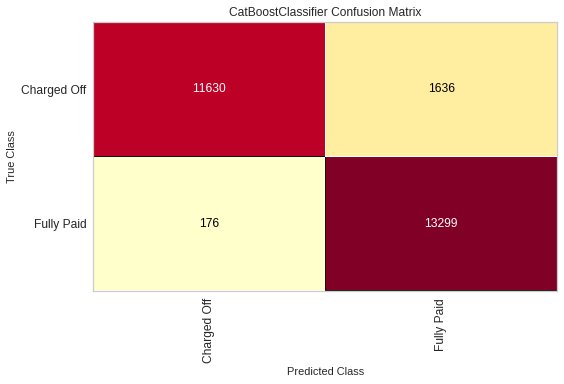

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.contrib.wrapper import wrap, CLASSIFIER
model=wrap(cat)
cm = ConfusionMatrix(model, classes=lb.classes_)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y=y_test.values.ravel())

# How did we do?
cm.poof()

## ***feature_importances***

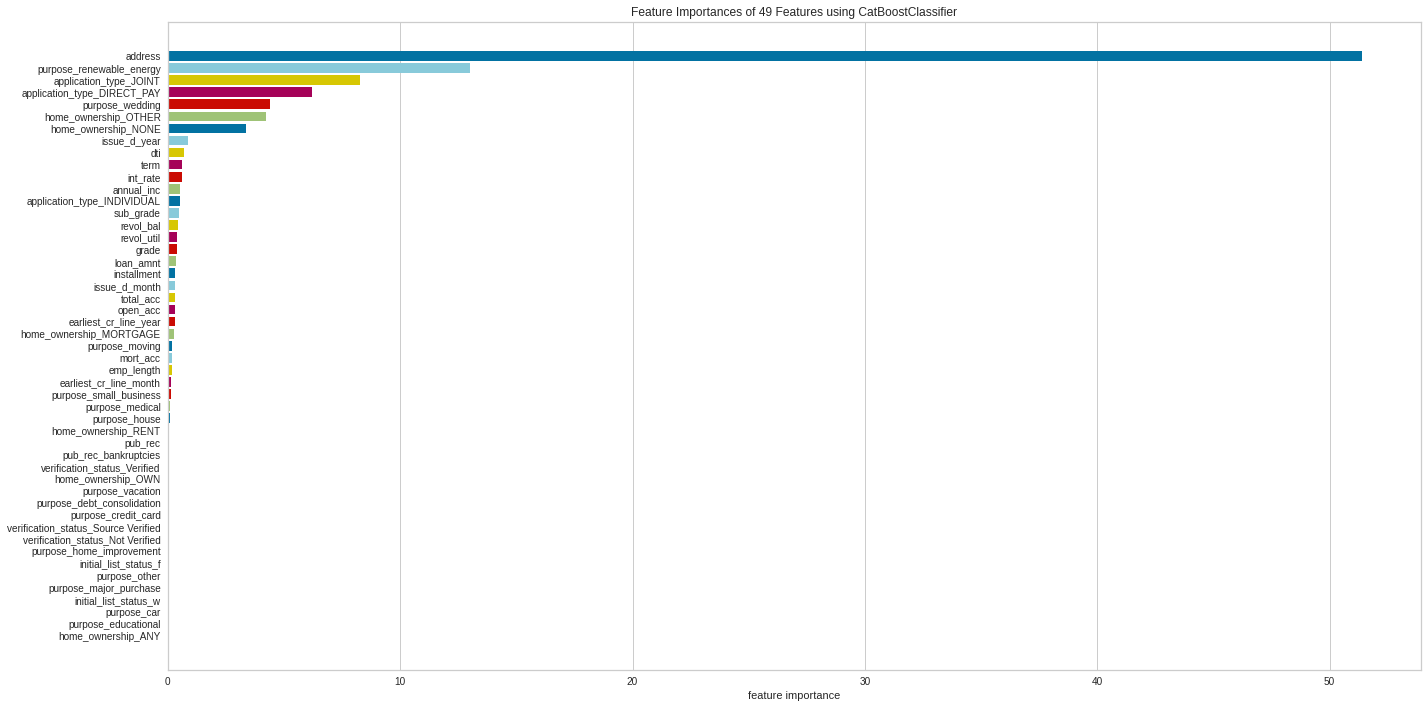

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f81fb809bd0>,
                   colormap=None, colors=None,
                   estimator=<yellowbrick.contrib.wrapper.ContribEstimator object at 0x7f81f7462e10>,
                   is_fitted='auto', labels=None, relative=False, stack=False,
                   topn=None, xlabel=None)

In [ ]:
from yellowbrick.features import feature_importances
plt.figure(figsize=(20,10))
feature_importances(model, x_train, y_train.values.ravel(), relative=False,)


## ***roc_auc***

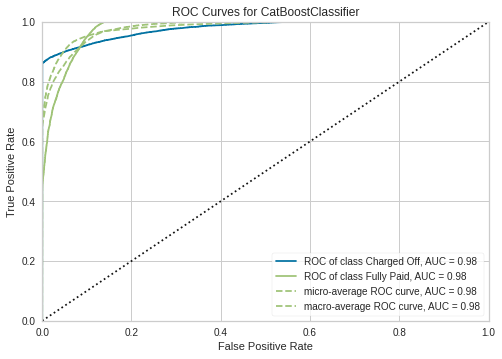

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f81fb453890>,
       binary=None, classes=array(['Charged Off', 'Fully Paid'], dtype=object),
       encoder=None,
       estimator=<yellowbrick.contrib.wrapper.ContribEstimator object at 0x7f81f7462e10>,
       force_model=False, is_fitted='auto', macro=True, micro=True,
       per_class=True)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load the classification dataset

# Instantiate the visualizer with the classification model

roc_auc(model, x_train, y_train.values.ravel(), X_test=x_test, y_test=y_test.values.ravel(), classes=lb.classes_)

## ***ClassPredictionError***

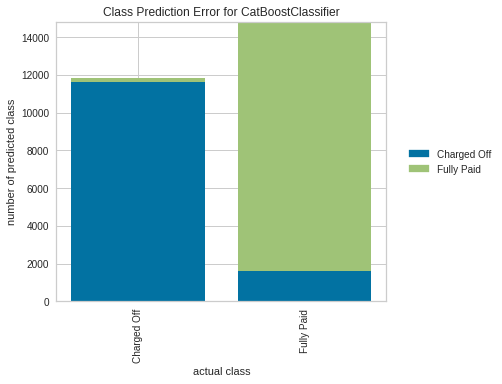

In [ ]:
from yellowbrick.classifier import ClassPredictionError



visualizer = ClassPredictionError(
   model, classes=lb.classes_
)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train.values.ravel())


# Evaluate the model on the test data
visualizer.score(x_test, y_test.values.ravel())
visualizer.poof()


## ***RadViz***

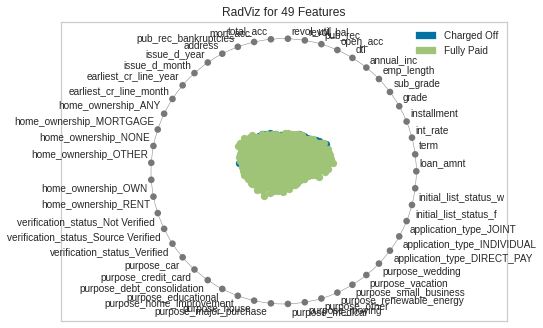

In [ ]:
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=lb.classes_)

visualizer.fit_transform_show(x_train, y_train.values.ravel())         # Fit the data to the visualizer

visualizer.poof()              # Finalize and render the figure

## ***Rank2D***

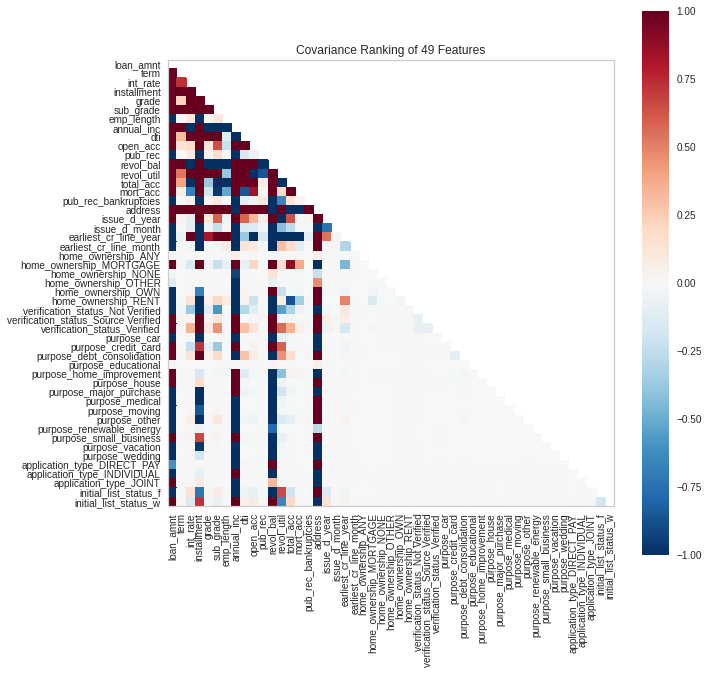

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d,Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='covariance',features=list(x_train))
plt.figure(figsize=(10,10))
visualizer.fit_transform(x_train, y_train.values.ravel())          # Fit the data to the visualizer        # Transform the data
visualizer.poof()


## ***Rank1D***

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


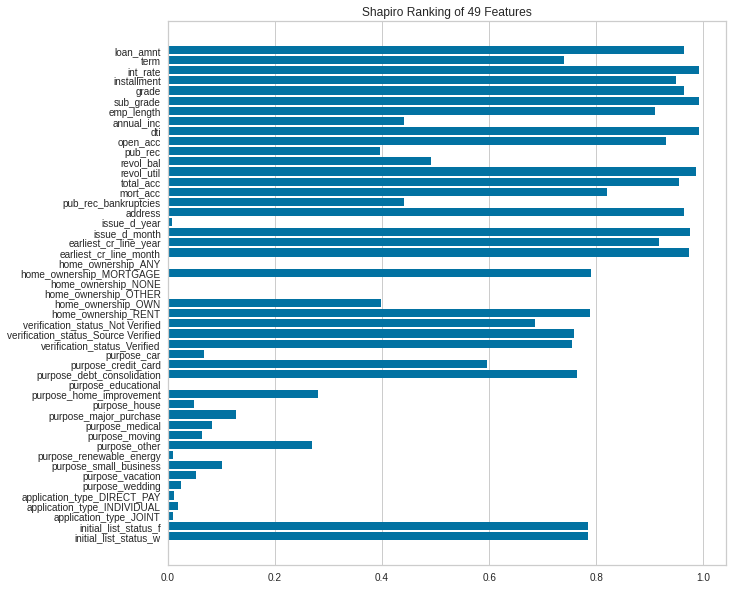

array([[1.10000000e+04, 0.00000000e+00, 1.53100000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.08000000e+04, 0.00000000e+00, 7.89000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.50000000e+04, 1.00000000e+00, 1.53100000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.62131552e+04, 8.49627518e-01, 1.97681549e+01, ...,
        1.16871758e-04, 8.89793702e-01, 1.10206298e-01],
       [6.00000000e+03, 0.00000000e+00, 1.43300000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.00000000e+03, 0.00000000e+00, 1.53100000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:

from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro',features=list(x_train))

plt.figure(figsize=(10,10))
visualizer.fit_transform_show(x_train.values, y_test.values.ravel())          # Fit the data to the visualizer        # Transform the data


## ***ClassificationReport***

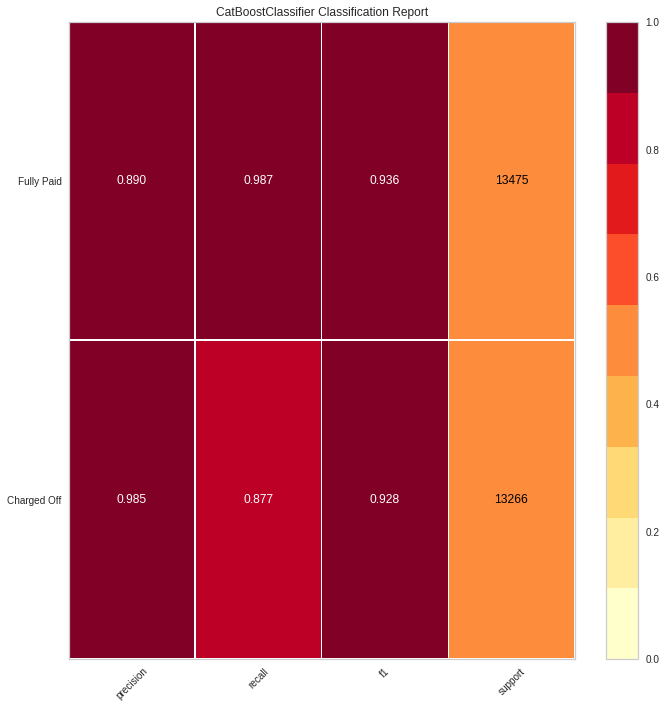

In [ ]:
from yellowbrick.classifier import ClassificationReport




#
visualizer = ClassificationReport(model, classes=lb.classes_, support=True,)

visualizer.fit(x_train, y_train.values.ravel())


# Evaluate the model on the test data
plt.figure(figsize=(10,10))
visualizer.score(x_test, y_test.values.ravel())
visualizer.poof()                      # Finalize and show the figure

## ***DecisionViz***

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

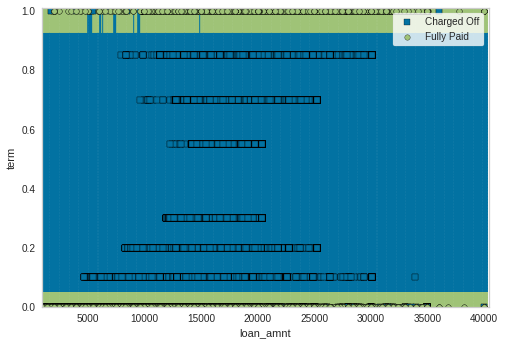

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz

viz = DecisionViz(
    model, title="Catboost",
    features=list(x_train.iloc[:,[0,1]]), classes=lb.classes_
)
viz.fit(x_train.iloc[:,[0,1]].values, y_train.values.ravel())
viz.draw(x_test.iloc[:,[0,1]].values, y_test.values.ravel())
viz.poof()

## ***PrecisionRecallCurve***

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



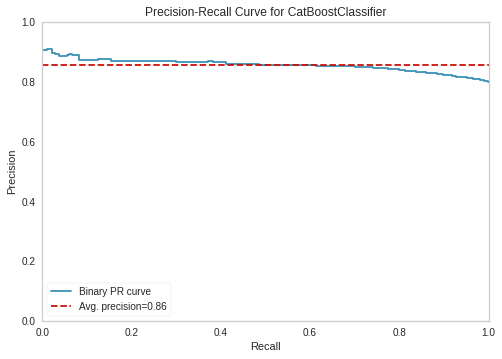

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game



viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

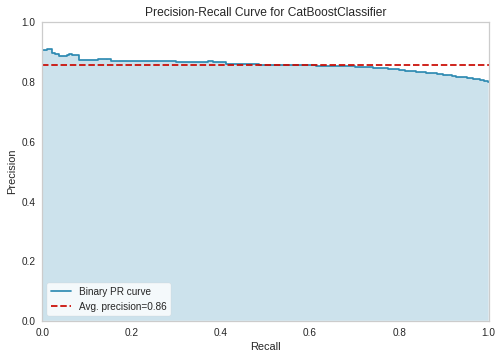

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

# ***DNN***

In [ ]:
!pip install adabelief_tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Normalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD,Adadelta,Nadam,Adagrad
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow.keras.layers
import tensorflow as tf
model = Sequential()
scaler = MinMaxScaler()
x=data.drop(['loan_status'],axis=1)
y=data['loan_status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)
x_train = scaler.fit_transform(x_train)

rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=.3, patience=2, verbose=1, min_delta=1e-3,min_lr=1e-7)
############
model.add(Normalization(input_shape=[49,], axis=None))
model.add(Dense(units=300, activation=tensorflow.keras.layers.ELU()))
model.add(Dense(units=40, activation=tensorflow.keras.layers.ELU()))
model.add(Dense(units=2, activation=tensorflow.keras.layers.ELU()))
#########
from adabelief_tf import AdaBeliefOptimizer


model.compile(optimizer=AdaBeliefOptimizer(learning_rate=1e-1, epsilon=1e-8, rectify=True), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, validation_split=0.15, batch_size=512, epochs=5, shuffle=True,  callbacks=[rlronp])

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.1)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Epoch 1/5
530/530 [==============================] - 6s 8ms/step - loss: 0.7003 - accuracy: 0.801

In [ ]:
model.evaluate(x_test,y_test)

525/525 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.7988


[0.6931459307670593, 0.7987971901893616]